In [34]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
def read_df(url, sep):
    return pd.read_csv(url, sep = ";")

In [36]:
results = read_df('./iris.csv', ';')
results

,gp_plot_data,sol_train_accuracy,sol_validation_accuracy,sol_test_accuracy,sol_nn_architecture,sol_model_name,sol_plot_data,exec_time
0,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.0109,\\""...",0.914286,0.933333,0.933333,4:6:3,../results/models/iris_model_0.h5,"[{\epoch\"":1,\""value\"":1.0492,\""metric\"":\""los...",17.745562
1,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.1198,\\""...",0.352381,0.333333,0.200000,4:3:2:2:3,../results/models/iris_model_1.h5,"[{\epoch\"":1,\""value\"":1.2107,\""metric\"":\""los...",16.082831
2,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.0032,\\""...",0.342857,0.300000,0.333333,4:4:3,../results/models/iris_model_2.h5,"[{\epoch\"":1,\""value\"":1.2879,\""metric\"":\""los...",15.697432
3,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":0.9816,\\""...",0.971429,0.933333,1.000000,4:9:3,../results/models/iris_model_3.h5,"[{\epoch\"":1,\""value\"":4.0068,\""metric\"":\""los...",16.269020
4,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.0068,\\""...",0.857143,0.800000,0.800000,4:3:2:1:3:3,../results/models/iris_model_4.h5,"[{\epoch\"":1,\""value\"":4.5283,\""metric\"":\""los...",15.348464
5,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.0019,\\""...",0.676190,0.733333,0.666667,4:7:3,../results/models/iris_model_5.h5,"[{\epoch\"":1,\""value\"":2.8119,\""metric\"":\""los...",15.842743
6,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.046,\\""b...",0.657143,0.700000,0.666667,4:4:3,../results/models/iris_model_6.h5,"[{\epoch\"":1,\""value\"":1.0616,\""metric\"":\""los...",16.508496
7,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.0033,\\""...",0.752381,0.766667,0.866667,4:9:3,../results/models/iris_model_7.h5,"[{\epoch\"":1,\""value\"":1.7144,\""metric\"":\""los...",16.082256
8,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.0377,\\""...",0.352381,0.333333,0.200000,4:7:3,../results/models/iris_model_8.h5,"[{\epoch\"":1,\""value\"":1.1403,\""metric\"":\""los...",18.551145
9,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":0.9682,\\""...",0.352381,0.333333,0.200000,4:6:3,../results/models/iris_model_9.h5,"[{\epoch\"":1,\""value\"":1.0986,\""metric\"":\""los...",16.852984


AttributeError: 'list' object has no attribute 'plot'

<Figure size 432x288 with 0 Axes>

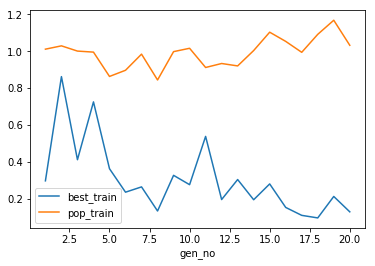

In [45]:
for index, row in results.iterrows():
    json_o = "[" + row["gp_plot_data"].replace("\\", "").replace("[", "").replace("]", "").replace("}\"", "}").replace("\"{", "{")[:-1] + "]"
    gp_plot_data = pd.DataFrame.from_records(json.loads(json_o), index = "gen_no")
    plt.figure()
    gp_plot_data.plot()
    json_o = row["sol_plot_data"].replace("\\", "").replace("epoch", "\"epoch", 1)[:-1]
    sol_plot_data = json.loads(json_o)
    sol_plot_data_a = pd.DataFrame.from_records([x for x in sol_plot_data if x["metric"] == "acc"], index = "epoch")
    sol_plot_data_e = pd.DataFrame.from_records([x for x in sol_plot_data if x["metric"] == "loss"], index = "epoch")
    sol_plot_data_a.plot()
    sol_plot_data_e.plot()

In [10]:
[
    {
        "gen_no": 1,
        "pop_train": 1.0109,
        "best_train": 0.2966
    },
    {
        
    }
]


"[[\[{\\"gen_no\\":1,\\"pop_train\\":1.0109,\\"best_train\\":0.2966}]\"],[\"[{\\"gen_no\\":2,\\"pop_train\\":1.0289,\\"best_train\\":0.8619}]\"],[\"[{\\"gen_no\\":3,\\"pop_train\\":1.0005,\\"best_train\\":0.4112}]\"],[\"[{\\"gen_no\\":4,\\"pop_train\\":0.9949,\\"best_train\\":0.7249}]\"],[\"[{\\"gen_no\\":5,\\"pop_train\\":0.8629,\\"best_train\\":0.3623}]\"],[\"[{\\"gen_no\\":6,\\"pop_train\\":0.8964,\\"best_train\\":0.235}]\"],[\"[{\\"gen_no\\":7,\\"pop_train\\":0.9839,\\"best_train\\":0.2637}]\"],[\"[{\\"gen_no\\":8,\\"pop_train\\":0.8437,\\"best_train\\":0.1329}]\"],[\"[{\\"gen_no\\":9,\\"pop_train\\":0.9975,\\"best_train\\":0.3264}]\"],[\"[{\\"gen_no\\":10,\\"pop_train\\":1.0157,\\"best_train\\":0.2757}]\"],[\"[{\\"gen_no\\":11,\\"pop_train\\":0.9115,\\"best_train\\":0.5376}]\"],[\"[{\\"gen_no\\":12,\\"pop_train\\":0.9331,\\"best_train\\":0.1951}]\"],[\"[{\\"gen_no\\":13,\\"pop_train\\":0.92,\\"best_train\\":0.3036}]\"],[\"[{\\"gen_no\\":14,\\"pop_train\\":1.0034,\\"best_train\\":0.194}]\"],[\"[{\\"gen_no\\":15,\\"pop_train\\":1.103,\\"best_train\\":0.2798}]\"],[\"[{\\"gen_no\\":16,\\"pop_train\\":1.0531,\\"best_train\\":0.1523}]\"],[\"[{\\"gen_no\\":17,\\"pop_train\\":0.9938,\\"best_train\\":0.1093}]\"],[\"[{\\"gen_no\\":18,\\"pop_train\\":1.0913,\\"best_train\\":0.0954}]\"],[\"[{\\"gen_no\\":19,\\"pop_train\\":1.1678,\\"best_train\\":0.2118}]\"],[\"[{\\"gen_no\\":20,\\"pop_train\\":1.0319,\\"best_train\\":0.1284}]\"]]"

SyntaxError: invalid syntax (<ipython-input-10-14a4e2ced3cc>, line 1)